First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Basic info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies             

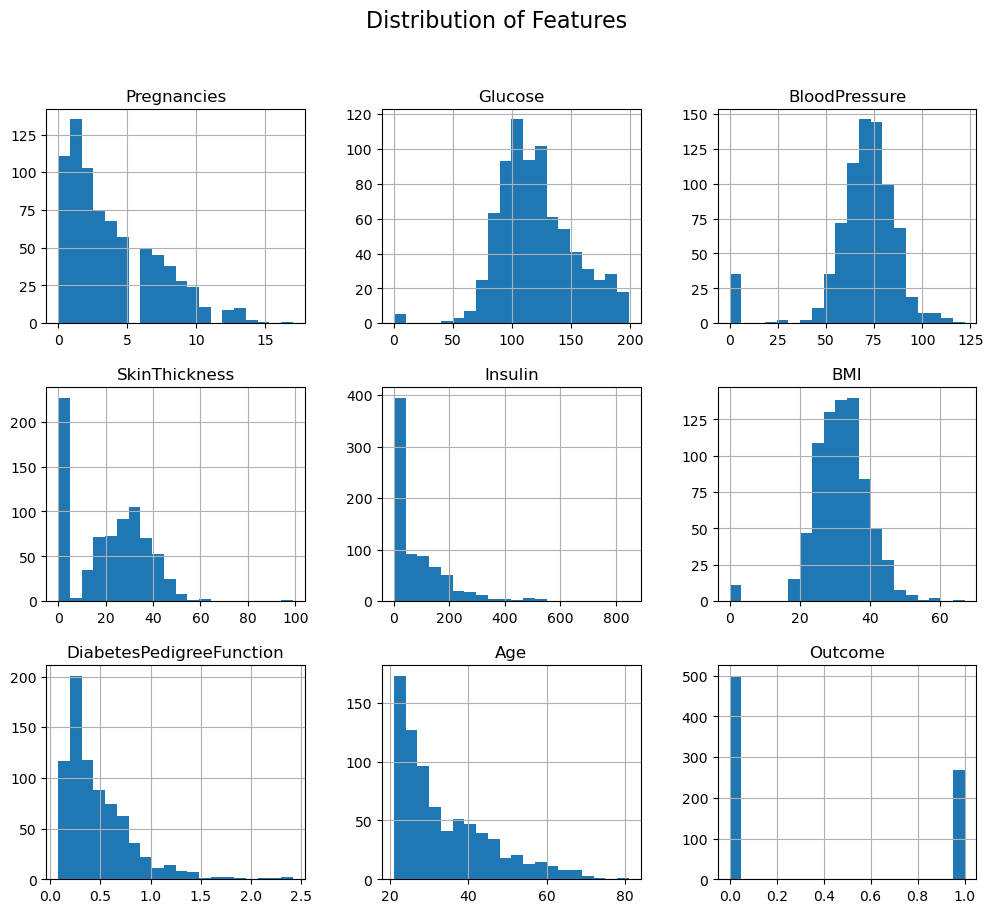

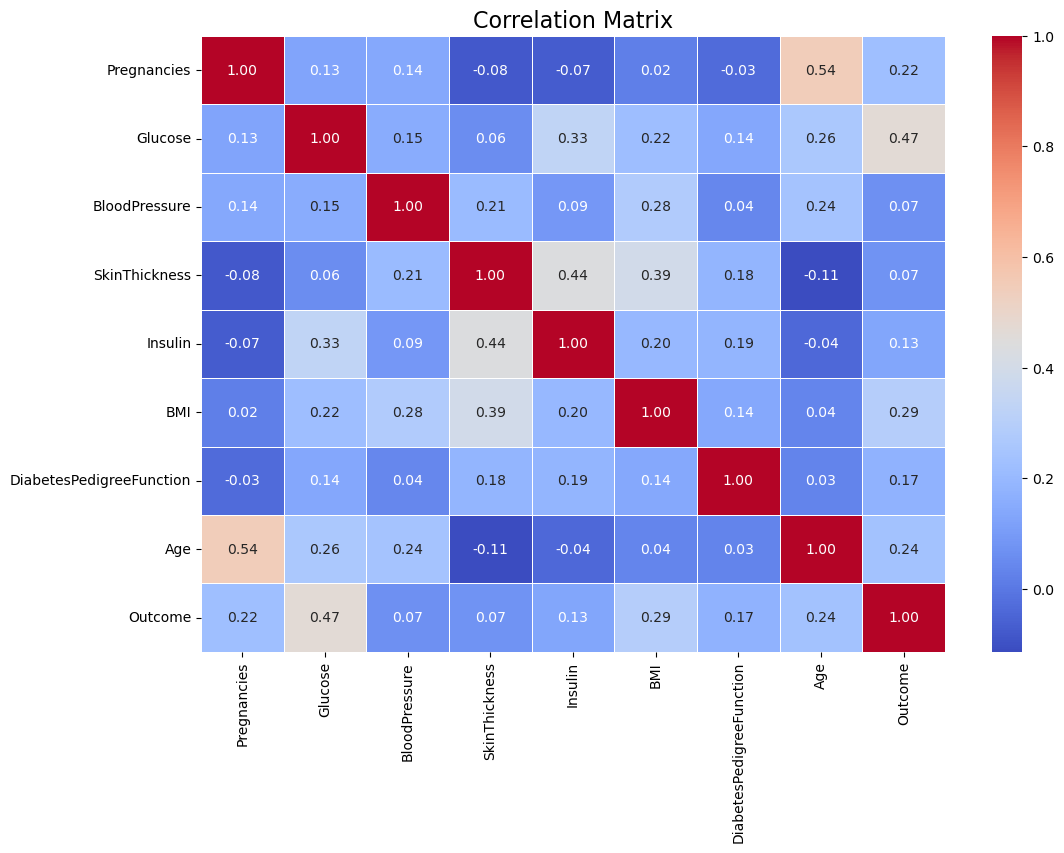

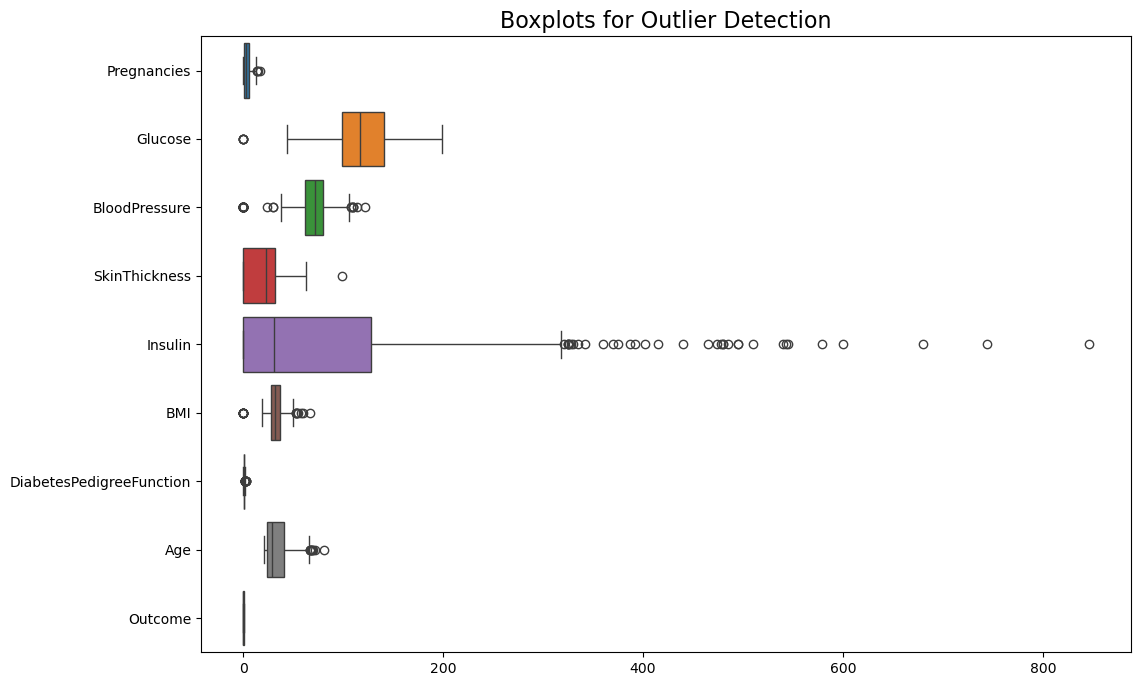


Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Training data shape: (614, 9)
Test data shape: (154, 9)


In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

# Data Overview
print("First 5 rows of the dataset:")
print(df.head())

print("\nBasic info about the dataset:")
df.info()

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Data summary (statistics)
print("\nStatistical summary of the dataset:")
print(df.describe())

# Data Exploration (Visualizations)

# Distribution of each feature
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Boxplots for identifying outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplots for Outlier Detection', fontsize=16)
plt.show()

# Data Preprocessing

# Handle missing values (if any)
# Check if there are any zero values in the dataset which can be treated as missing for some columns
df.replace(0, np.nan, inplace=True)

# Impute missing values (mean imputation) for the columns with missing values
df.fillna(df.mean(), inplace=True)

# Check again for missing values after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Feature Engineering (Optional)
# For instance, create new features if applicable, e.g., interaction terms (Pregnancies * Age)
df['Pregnancies_Age'] = df['Pregnancies'] * df['Age']

# Split the dataset into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Train-test split (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final shape of the training and test datasets
print(f"\nTraining data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
